# 理解导数

你刚才看到了这三个陈述。

> 1. **速度** 是**位置（或位移）**的瞬时变化率
> 2. **速度** 是**位置（或位移）**的切线的斜率
> 3. **速度** 是**位置（或位移）**的导数

当你对什么是导数有一个直观的理解时，通过这个 notebook 中对导数的探索，你会发现它的另一个更正式的（数学）定义。

## 进行下一步之前
这个 notebook 比较长，因为确实需要仔细阅读，才能对你有所帮助。在进行下一步之前，请确保：

1. 你**至少可以花30分钟**的时间停留在这里。
2. 你有精力阅读一些数学和（偶尔）复杂的代码。


-----

## 导数的正式定义

 $f(t)$**在 t 处的导数**是函数$\dot{f}(t)$（“f点t”），并被定义为

$$\dot{f}(t) = \lim_{\Delta t \to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}$$

你应该这样读这个公式：

*"f点 t等于 f （ t加上德尔塔 t）减去 f(t) 的值，除以德尔塔 t ，德尔塔 t 趋近于0时的极限。"*

## 概要
在这个notebook中，我们将通过一系列活动来解开这个定义，在最后的时候，我们将定义一个名为`approximate_derivative`的python函数。这个函数看起来与上面的数学公式非常相似。

下面是整个过程的粗略概述：

1. **离散运动与连续运动** - 快速浏览一下**离散运动**与**连续运动**之间的差异，再做一些在代码中定义连续函数的练习。

2. **绘制连续函数曲线图** - 在这里，你将看到`plot_continuous_function`函数，它是一个将**另一个函数**作为输入的函数。

3. **"手动"发现导数** - 在这里，你可以通过放大**位置与时间**关系图并查找斜率，*在特定的时间*找到某个对象的**速度**。

4. **通过算法发现导数** - 在这里，你将使用一个函数来重现刚刚“手动”操作的步骤。

5. **可选：找到完整的导数** - 在步骤3和4中，你实际上可以找到一个函数*在特定时间点*的导数。在这里你将看到如何一次性获取一个函数**所有**时间点的导数。请注意，代码在这里会变得有点奇怪。


-----

## 1 - 离散运动与连续运动

我们在无人驾驶汽车中处理的数据对我们来说是离散的。也就是说，它只能在某些时间戳处会涉及我们所需的数据。例如，我们可能在时间戳`t=352.396`处获得位置测量值，并在时间戳`t=352.411`处获取下一个位置测量值。但是，这两次测量之间发生了什么？例如在`t=352.400` 时，车辆**没有位置数据**吗？

当然不是！

> 即使我们测量的位置数据是**离散的**，但我们知道车辆的实际运动是**连续的**。

假设我在`t=0`、`x=0`时，以$2 m/s$的速度开始向前移动。在t = 1时，x将为2；在t = 4时，x将为8。我可以以1秒为间隔绘制我的位置图，如下所示：

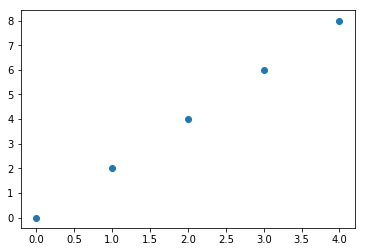

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

t = [0,1,2,3,4]
x = [0,2,4,6,8]

plt.scatter(t,x)
plt.show()

以上图表是运动的**离散**图片。这张图来自两个Python**列表**...

但是底层的**连续**运动呢？我们可以用这样的一个函数$f$ 来表示这个连续运动：

$$f(t)=2t$$


但我们如何在代码中表示呢？

一个列表是不行的！我们需要定义一个函数（此处有惊喜）！

In [2]:
def position(time):
    return 2*time

print("at t =", 0, "position is", position(0))
print("at t =", 1, "position is", position(1))
print("at t =", 2, "position is", position(2))
print("at t =", 3, "position is", position(3))
print("at t =", 4, "position is", position(4))

at t = 0 position is 0
at t = 1 position is 2
at t = 2 position is 4
at t = 3 position is 6
at t = 4 position is 8


这看起来是正确的，并且与我们上面的数据相匹配。此外，它还可用于获取车辆在“传感器测量值”之间的位置。

In [3]:
print("at t =", 2.2351, "position is", position(2.2351))

at t = 2.2351 position is 4.4702


这个`position(time)` 函数是时间的连续函数。当你在导数的正式定义中看到 $f(t)$时，你应该已经想到这样的函数。

-----

## 2 - 绘制连续函数曲线图

既然我们有了一个连续的函数，那么如何绘制它的曲线图呢？

我们将使用`numpy`和一个名为`linspace`的函数来帮助我们。首先让我来演示如何绘制时间在0到4之间的位置函数的曲线图。

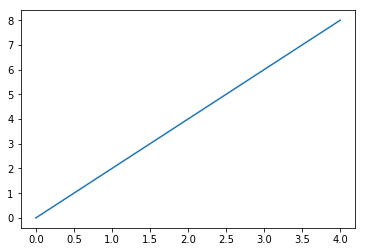

In [4]:
# Demonstration of continuous plotting

import numpy as np

t = np.linspace(0, 4)
x = position(t)

plt.plot(t, x)
plt.show()

#### 练习 - 创建并绘制一个时间的连续函数曲线图
**编写一个代表以下运动的函数`position_b(time)`：**

$$f(t)=-4.9t^2 + 30t$$

**然后绘制从t = 0到t = 6.12的函数曲线图**

In [ ]:
# EXERCISE
def position_b(time):
    # todo
    pass

# don't forget to plot this function from t=0 to t=6.12  
# Solution is below.

In [ ]:
#

#

#

# Spoiler alert! Solution below!

#

#

#

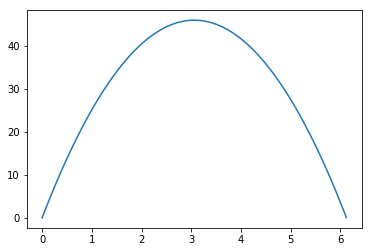

In [5]:
def position_b(time):
    return -4.9 * time ** 2 + 30 * time

t = np.linspace(0, 6.12)
z = position_b(t)

plt.plot(t, z)
plt.show()

**有趣的事实（也许）**

我在绘图代码中使用变量`z`是有原因的。`z`通常用于表示距地面以上的距离，你刚才绘制的函数曲线图实际上代表以 $30 m/s$ 的初始速度向上抛起的球的高度。正如你所看到的，球在投掷被后约3秒达到了最大高度。

### 2.1 - 概括我们的绘图代码
我不想保留复制和粘贴绘图代码，所以我只想编写一个函数...

In [ ]:
def plot_continuous_function(function, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = function(t)
    plt.plot(t,x)

In [ ]:
plot_continuous_function(position_b, 0, 6.12)
plt.show()

看一看 `plot_continuous_function` 。

注意到它有什么奇怪的地方吗？

这个函数实际上*将另一个函数作为输入*。在Python中这是一个非常有效的事情，但我知道我第一次看到这样的代码时，我发现很难搞懂到底是怎么回事。

稍后在这个 notebook 中，你会看到一个函数，它实际上会`return`另一个函数！

现在，让我告诉你其他可以使用`plot_continuous_function`的方法。

In [ ]:
def constant_position_motion(time):
    position = 20
    return position + 0*time

def constant_velocity_motion(time):
    velocity = 10
    return velocity * time

def constant_acceleration_motion(time):
    acceleration = 9.8
    return acceleration / 2 * time ** 2
    
plot_continuous_function(constant_position_motion, 0, 20)
plt.show()

In [ ]:
# position vs time 
# with constant VELOCITY motion

plot_continuous_function(constant_velocity_motion, 0, 20)
plt.show()

In [ ]:
# position vs time
# with constant ACCELERATION motion

plot_continuous_function(constant_acceleration_motion, 0, 20)
plt.show()

----

## 3 -  “手动”发现*特定点* 的导数

让我们回到之前的向上抛球的例子，看看我们能否在不同的时间找到球的**速度**。还记得吗，图表看起来是这样的：

In [ ]:
plt.title("Position vs Time for ball thrown upwards")
plt.ylabel("Position above ground (meters)")
plt.xlabel("Time (seconds)")
plot_continuous_function(position_b,0,6.12)
plt.show()

现在我想知道球在t = 2秒时的**速度**。

> 目标 - 找到球在t = 2秒时的速度

请牢记，**速度是位置的导数**，这意味着**速度是位置的切线的斜率** 。

现在，我们有了位置与时间的关系......只需要找到在那个图中， t = 2 时的切线的斜率就可以了。

要做到这一点，其中一种方法是放大图表直到曲线开始看起来是直的。我可以通过改变`plot_continuous_function`的两个输入，即`t_min`和`t_max` ，来做到这一点。

#### 练习 - 通过放大，使函数“线性化”

下面的代码可以让你调整单个参数`DELTA_T`，从而控制具体要放大多少。

仔细阅读并运行代码，了解其工作原理。

然后，调整`DELTA_T`，直到图形看起来像一条直线。接下来，首先尝试`DELTA_T = 3.0`，然后尝试`DELTA_T = 2.5`，然后尝试`2.0` ，等...

“导数的正式定义”中有一部分是这样的：

$$\lim_{\Delta t \to 0}$$

在这个练习中，我们将探索的是，为什么“将 delta t 变为零“，非常有必要。

In [ ]:
DELTA_T = 3.0

# you don't need to touch the code below

t_min = 2 - (DELTA_T / 2)
t_max = 2 + (DELTA_T / 2)

plt.title("Position vs Time for ball thrown upwards")
plt.ylabel("Position above ground (meters)")
plt.xlabel("Time (seconds)")
plot_continuous_function(position_b, t_min, t_max)
plt.show()

尝试一下，当`DELTA_T = 0.06`时，图形如下所示：

![](https://s3.cn-north-1.amazonaws.com.cn/u-img/linearized.png)

在我看来，它已经非常直了。由于我们放大了很多，所以这个图形看起来像一条直线。

该曲线的切线在t = 2时的斜率将会非常接近*该直线的* 线性近似斜率。

那么这条线的斜率是多少呢？

$$\text{slope}=\frac{\text{vertical change in graph}}{\text{horizontal change in graph}}$$

或者，另一种表示方法是：

$$\text{slope}=\frac{\Delta z}{\Delta t}$$

**垂直变化**

该位置在开始时的值约为**40.08**（不到40.1），最后升至约**40.71**。所以垂直变化是

$$\Delta z = 40.71 - 40.08 = 0.63 \text{ meters}$$ 

**水平变化**

水平变化就是 $\Delta t$，在这个示例中是0.06秒。

**斜率**

$$\text{slope} = \frac{0.63 \text{ meters}}{0.06 \text{ seconds}} = 10.5 \text{ meters per second}$$

----

## 4 - 通过算法发现*特定点* 的导数

我们为什么一定要通过查看图表来计算垂直变化呢？下面，让我们以数字方式获得确切的变化值。

图表放大后的位置变化（其显示从 $t = 1.97$到 $t = 2.03$ 的值）在数学上表示如下：

$$\Delta z = f(2.03) - f(1.97)$$

我们也可以用代码来计算它！

In [ ]:
DELTA_Z = position_b(2.03) - position_b(1.97)
DELTA_T = 0.06
SLOPE = DELTA_Z / DELTA_T

print("the graph goes from", position_b(1.97), "at t=1.97")
print("to", position_b(2.03), "at t=2.03")
print("which is a delta z of", DELTA_Z)
print()
print("This gives a slope of", SLOPE)

使用函数的**精确**值，可以为我们提供一个更精确的斜率值（以及球的速度）。但现在，看起来我们已经给出了问题的答案：

> t = 2时，球的速度为**10.4 米/秒**

#### 练习 ： t = 3.45时，找到球的速度

使用类似于我们在$t=2$所做的一系列步骤，找到$t=3.45$时球的速度

In [ ]:
# Your code here!




In [ ]:
#

#

#

# Spoiler alert! Solution below!

#

#

#

#

In [ ]:
# SOLUTION - FIRST ATTEMPT

# 1. set some relevant parameters
TIME    = 3.45
DELTA_T = 0.02

# 2. The "window" should extend 0.01 to the left and 
#    0.01 to the right of the target TIME
t_min = TIME - (DELTA_T / 2)
t_max = TIME + (DELTA_T / 2)

# 3. calculate the value of the function at the left and
#    right edges of our "window"
z_at_t_min = position_b(t_min)
z_at_t_max = position_b(t_max)

# 4. calculate vertical change
delta_z = z_at_t_max - z_at_t_min

# 5. calculate slope
slope = delta_z / DELTA_T

print("speed is",slope, "m/s at t =", TIME)

你可以在上面看到我的解决方案。该代码*近似于* 时间在$t=3.45$时，position_b函数的导数。

通过一些修改，我们可以将它变成一个函数，使其近似于**任何**一个函数在**任何**时间点的导数！

In [ ]:
# SOLUTION - second (better) version
def approximate_derivative(f, t):
    # 1. Set delta_t. Note that I've made it REALLY small.
    delta_t = 0.00001
    
    # 2. calculate the vertical change of the function
    #    NOTE that the "window" is not centered on our 
    #    target time anymore. This shouldn't be a problem
    #    if delta_t is small enough.
    vertical_change = f(t + delta_t) - f(t)
    
    # 3. return the slope
    return vertical_change / delta_t

deriv_at_3_point_45 = approximate_derivative(position_b, 3.45)
print("The derivative at t = 3.45 is", deriv_at_3_point_45)

让我们将上面函数中的代码与导数的数学定义联系起来...

>  **$f(t)$ 在 t 处的导数**是函数$\dot{f}(t)$，并被定义为

> $$\dot{f}(t) = \lim_{\Delta t \to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}$$

1. 正如你所看到的，我使`delta_t`非常小（0.00001），以便接近“ $\Delta t$ 趋近于0”的极限。但是，为什么不设置`delta_t = 0.0` 呢？大胆尝试吧！在上面的函数中尝试它。看看当你试图运行它时，会发生什么:)

2. 函数在时间`t`处的垂直变化的计算方式与数学定义所规定的完全相同。

3. 斜率计算也相同。

----

## 5 - 可选：找到“完整的”导数

`approximate_derivative`函数非常好用，因为它适用于任何一个函数的任意一点。但是我想知道任意一个函数在**每**一点的导数。

> 目标 - 我需要一个函数，它会将一个连续函数作为输入，然后生成另一个连续函数，并将其作为输出。输出函数应该是输入函数的导数。

In [ ]:
# These four lines of code do exactly what we wanted!
# There is a good chance that this will be the 
# hardest-to-understand code you see in this whole 
# Nanodegree, so don't worry if you're confused. 

def get_derivative(f):
    def f_dot(t):
        return approximate_derivative(f,t)
    return f_dot

阅读并运行上面的代码之后，尝试运行下面的代码单元格，了解为什么这个函数如此有用...

In [ ]:
# plot 1 - a reminder of what our position function looks like.
#         Remember, this is a plot of vertical POSITION vs TIME
#         for a ball that was thrown upwards.

plt.title("Position vs Time for ball thrown upwards")
plt.ylabel("Position above ground (meters)")
plt.xlabel("Time (seconds)")
plot_continuous_function(position_b, 0, 6.12)
plt.show()

In [ ]:
# plot 2 - a plot of VELOCITY vs TIME for the same ball! Note 
#    how the ball begins with a large positive velocity (since
#    it's moving upwards) and ends with a large negative 
#    velocity (downwards motion right before it hits the ground)

velocity_b = get_derivative(position_b)
plot_continuous_function(velocity_b, 0, 6.12)
plt.show()

In [ ]:
# plot 3 - a plot of ACCELERATION vs TIME for the same ball.
#    Note that the acceleration is a constant value 
#    of -9.8 m/s/s. That's because gravity always causes 
#    objects to accelerate DOWNWARDS at that rate.

acceleration_b = get_derivative(velocity_b)
plt.ylim([-11, -9])
plot_continuous_function(acceleration_b, 0, 6.12)
plt.show()

In [ ]:
# plot 4 - All 3 plots at once!
plot_continuous_function(position_b, 0, 6.12)
plot_continuous_function(velocity_b, 0, 6.12)
plot_continuous_function(acceleration_b, 0, 6.12)
plt.show()

现在你已经看到了`get_derivative`可以帮我们做什么，下面就让我们试着了解它是如何工作的...

In [ ]:
def get_derivative(f):
    def f_dot(t):
        return approximate_derivative(f,t)
    return f_dot

我们一行一行地向下看。

1. `def get_derivative(f):` 这里需要注意的重要一点是，这个函数只需要一个输入，而这个输入是一个函数`f`。

2. `def f_dot(t):` 这里，我们在`get_derivative` 里面定义了一个新的函数。并且请注意，这个函数只需要一个输入`t`。

3. `return approximate_derivative(f,t)` 在这里，我们定义`f_dot`**在被时间 `t` 调用时** 的行为。我们想要做的是近似于函数`f` 在时间`t` 处的导数。

4. `return f_dot` 在这里，我们返回的是我们刚刚定义的函数！你觉得很奇怪吧，但如果仔细想一想就合理了。现在，如果思考一下`get_derivative`函数的全局作用，就是这样：将一个函数作为输入，然后产生另一个函数（即导数），并将其作为输出。